<a href="https://colab.research.google.com/github/joy1303125/Basic-python-programming/blob/master/Stock_Price_analysis_by_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-12-1')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,0,0.0
2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,0,0.0
2015-01-06,42.012001,42.840000,40.841999,42.256001,31309500,0,0.0
2015-01-07,42.669998,42.956001,41.956001,42.189999,14842000,0,0.0
2015-01-08,42.562000,42.759998,42.001999,42.124001,17212500,0,0.0
...,...,...,...,...,...,...,...
2020-11-23,503.500000,526.000000,501.790009,521.849976,50260300,0,0.0
2020-11-24,540.400024,559.989990,526.200012,555.380005,53648500,0,0.0
2020-11-25,550.059998,574.000000,545.369995,574.000000,48930200,0,0.0


In [2]:
tickerDf.tail(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-25,550.059998,574.000000,545.369995,574.000000,48930200,0,0.0
2020-11-27,581.159973,598.780029,578.450012,585.760010,37561100,0,0.0
2020-11-30,602.210022,607.799988,554.510010,567.599976,63003100,0,0.0


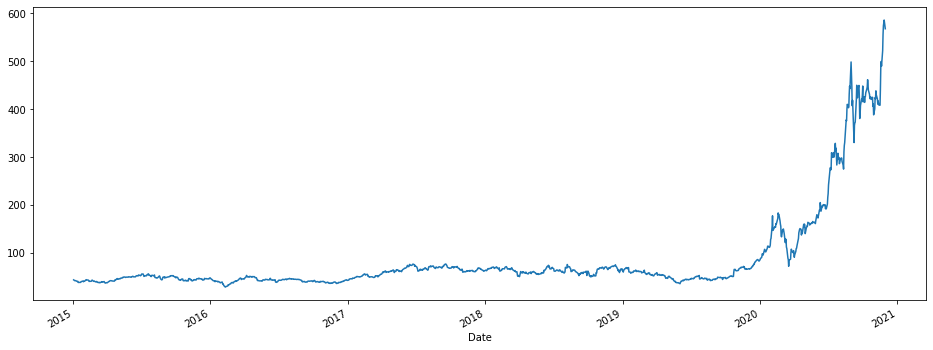

In [3]:
tickerDf['Close'].plot(figsize=(16,6))

In [4]:
tickerDf.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,42.446000,42.770857,41.389428,42.032000,2.387450e+07,0.0,0.0
2015-01-13,41.887429,42.324000,41.036571,41.601715,2.366943e+07,0.0,0.0
2015-01-14,41.066857,41.715428,40.403428,41.104571,2.808614e+07,0.0,0.0


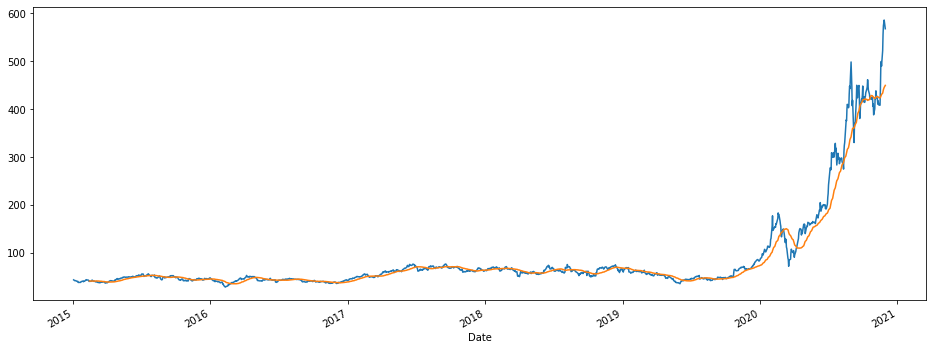

In [5]:

tickerDf['Close'].plot(figsize=(16,6))
tickerDf.rolling(window=30).mean()['Close'].plot()

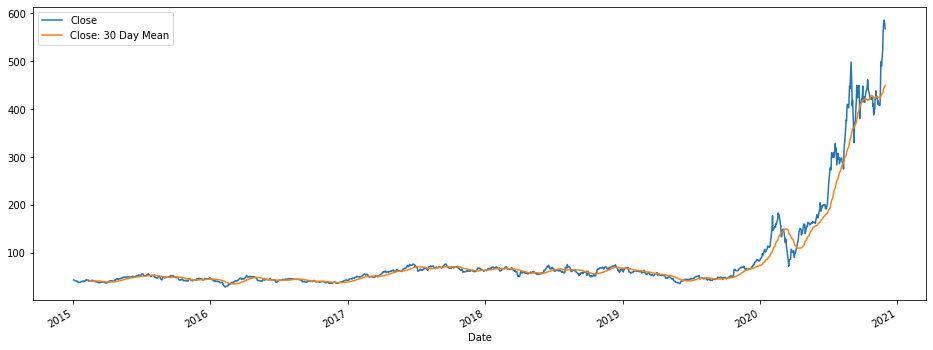

In [6]:
tickerDf['Close: 30 Day Mean'] = tickerDf['Close'].rolling(window=30).mean()
tickerDf[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

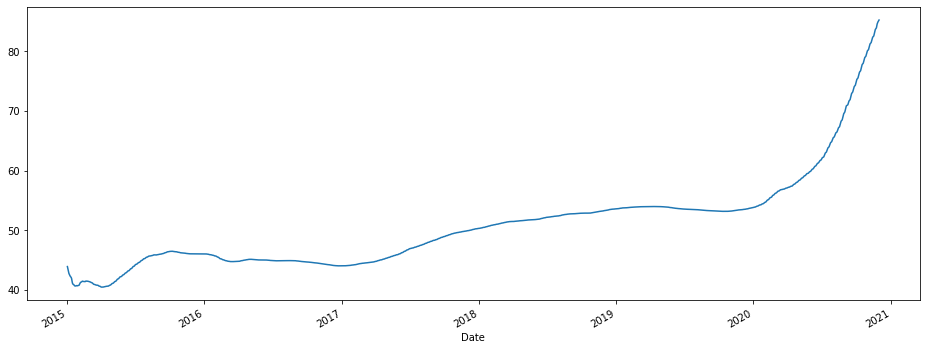

In [7]:
tickerDf['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [8]:
df1=tickerDf.reset_index()['Close']

df1

0        43.862000
1        42.018002
2        42.256001
3        42.189999
4        42.124001
           ...    
1484    521.849976
1485    555.380005
1486    574.000000
1487    585.760010
1488    567.599976
Name: Close, Length: 1489, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

print(df1)
print(df1.shape)
df1.ndim

[[0.02715852]
 [0.02384808]
 [0.02427535]
 ...
 [0.97888786]
 [1.        ]
 [0.96739823]]
(1489, 1)


2

In [10]:
features_set = []
labels = []
for i in range(60, len(df1)):
    features_set.append(df1[i-60:i, 0])
    labels.append(df1[i, 0])
    if i<=61:
        print(features_set)
        print(labels)

[array([0.02715852, 0.02384808, 0.02427535, 0.02415686, 0.02403838,
       0.02261654, 0.02101877, 0.02175123, 0.01760061, 0.0173062 ,
       0.01773705, 0.01732774, 0.01899373, 0.02080693, 0.02068844,
       0.02257705, 0.02237238, 0.01999907, 0.02209233, 0.02151785,
       0.02415327, 0.02681742, 0.02688564, 0.02776172, 0.02645837,
       0.02650145, 0.02607419, 0.02482111, 0.02125933, 0.02157889,
       0.02178713, 0.02182663, 0.02442974, 0.02636861, 0.02286069,
       0.02170096, 0.02157529, 0.02280684, 0.02142449, 0.01926661,
       0.02006728, 0.02110135, 0.02045147, 0.01802789, 0.01695073,
       0.01674967, 0.01797762, 0.01701896, 0.01616083, 0.01868135,
       0.01833308, 0.02048019, 0.0186634 , 0.0195359 , 0.02009242,
       0.02084284, 0.01817869, 0.01678198, 0.01483952, 0.01683943])]
[0.01619314393739041]
[array([0.02715852, 0.02384808, 0.02427535, 0.02415686, 0.02403838,
       0.02261654, 0.02101877, 0.02175123, 0.01760061, 0.0173062 ,
       0.01773705, 0.01732774, 0.018

In [11]:
features_set, labels = np.array(features_set), np.array(labels)

In [12]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
model = Sequential()

In [15]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [16]:
model.add(Dropout(0.2))

In [17]:

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [18]:
model.add(Dense(units = 1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [21]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
45/45 [==============================] - 11s 115ms/step - loss: 0.0146
Epoch 2/100
45/45 [==============================] - 5s 115ms/step - loss: 0.0016
Epoch 3/100
45/45 [==============================] - 5s 120ms/step - loss: 0.0018
Epoch 4/100
45/45 [==============================] - 5s 116ms/step - loss: 0.0020
Epoch 5/100
45/45 [==============================] - 5s 117ms/step - loss: 0.0012
Epoch 6/100
45/45 [==============================] - 5s 115ms/step - loss: 0.0017
Epoch 7/100
45/45 [==============================] - 5s 119ms/step - loss: 0.0017
Epoch 8/100
45/45 [==============================] - 5s 119ms/step - loss: 0.0015
Epoch 9/100
45/45 [==============================] - 5s 119ms/step - loss: 0.0013
Epoch 10/100
45/45 [==============================] - 5s 116ms/step - loss: 0.0014
Epoch 11/100
45/45 [==============================] - 5s 116ms/step - loss: 0.0019
Epoch 12/100
45/45 [==============================] - 5s 115ms/step - loss: 0.0012
Epoch 13/100

In [22]:

tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf1 = tickerData.history(period='1d', start='2020-12-1', end='2020-12-31')

#see your data
tickerDf1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-01,597.590027,597.849976,572.049988,584.760010,40382800,0,0
2020-12-02,556.440002,571.539978,541.210022,568.820007,47775700,0,0
2020-12-03,590.020020,598.969971,582.429993,593.380005,42552000,0,0
2020-12-04,591.010010,599.039978,585.500000,599.039978,29401300,0,0
2020-12-07,604.919983,648.789978,603.049988,641.760010,56309700,0,0
2020-12-08,625.510010,651.280029,618.500000,649.880005,64265000,0,0
2020-12-09,653.690002,654.320007,588.000000,604.479980,71291200,0,0
2020-12-10,574.369995,627.750000,566.340027,627.070007,67083200,0,0
2020-12-11,615.010010,624.000000,596.799988,609.989990,46475000,0,0


In [38]:
real_stock_price =tickerDf1.iloc[:, 3:4].values
real_stock_price

array([[584.76000977],
       [568.82000732],
       [593.38000488],
       [599.03997803],
       [641.76000977],
       [649.88000488],
       [604.47998047],
       [627.07000732],
       [609.98999023],
       [639.83001709],
       [633.25      ],
       [622.77001953],
       [655.90002441],
       [695.        ],
       [649.85998535],
       [640.34002686],
       [645.97998047],
       [661.77001953],
       [663.69000244],
       [665.98999023],
       [694.7800293 ]])

In [39]:
test_set=tickerDf1['Close']
test_set=pd.DataFrame(test_set)
test_set.shape

(21, 1)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [43]:
dataset_total = pd.concat((tickerDf['Close'], tickerDf1['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(tickerDf1) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)



In [44]:
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price1 = scaler.inverse_transform(predicted_stock_price)

In [45]:
predicted_stock_price1=pd.DataFrame(predicted_stock_price1)
predicted_stock_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float32
dtypes: float32(1)
memory usage: 212.0 bytes


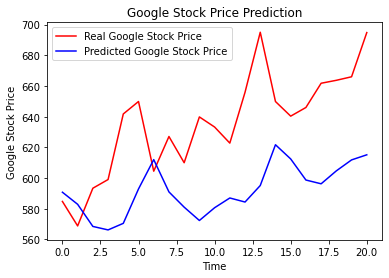

In [47]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
